In [3]:
# --- Step 1: Load & Inspect Zillow Data ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
data_path = Path("../data/raw/Metro_zori_uc_sfrcondomfr_sm_month.csv")

# Load dataset
df = pd.read_csv(data_path)

# Display structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Preview a few rows
df.head()

Shape: (698, 133)
Columns: ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,102001,0,United States,country,NaN,1194.531316,1201.046678,1209.977465,1219.121984,1228.210777,...,1958.792449,1957.650228,1962.835364,1970.998277,1982.771998,1992.064166,1999.318594,2004.282155,2006.596008,2007.274989
1,394913,1,"New York, NY",msa,NY,2351.780210,2367.437617,2387.395252,2407.639477,2423.298975,...,3382.720019,3378.051483,3388.342411,3407.729866,3438.834132,3470.845447,3500.222294,3533.544497,3564.752561,3586.664319
2,753899,2,"Los Angeles, CA",msa,CA,1787.178666,1798.766575,1814.303222,1829.251166,1844.157247,...,2899.602206,2894.018381,2915.550897,2937.835454,2961.810117,2960.318693,2964.186810,2968.745424,2971.566852,2972.770031
3,394463,3,"Chicago, IL",msa,IL,1392.310287,1399.360552,1409.318550,1418.774179,1428.961726,...,2041.268639,2046.162666,2054.015571,2070.492618,2088.966580,2110.838179,2130.799394,2149.924676,2161.314032,2165.433101
4,394514,4,"Dallas, TX",msa,TX,1084.461666,1089.321390,1097.092505,1108.512234,1118.155028,...,1709.813461,1705.309321,1703.769193,1709.865962,1719.074034,1728.984872,1731.425466,1732.477546,1729.376281,1726.004400


In [4]:
# --- Step 1b: Basic summary checks ---
# Check for missing values
print(df.isna().sum().sort_values(ascending=False).head(10))

# Convert date column if present
date_col = [c for c in df.columns if "Date" in c or "Month" in c]
print("Likely date column(s):", date_col)

# If monthly date column found, show range
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    print("Date range:", df[date_col[0]].min(), "→", df[date_col[0]].max())

2015-01-31    487
2015-02-28    485
2015-03-31    482
2015-04-30    477
2015-05-31    477
2015-07-31    476
2015-06-30    475
2015-08-31    475
2015-09-30    474
2015-10-31    473
dtype: int64
Likely date column(s): []


In [5]:
print(df.columns.tolist())

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-3

In [6]:
# --- Step 2: Reshape (Wide → Long) for time-series analysis ---

# Identify metadata vs date columns
meta_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_cols = [c for c in df.columns if c not in meta_cols]

# Melt into long format
df_long = df.melt(id_vars=meta_cols, value_vars=date_cols,
                  var_name='Date', value_name='Price')

# Convert the Date column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Drop rows with missing Price values
df_long = df_long.dropna(subset=['Price'])

# Verify
print(df_long.shape)
df_long.head()

(45903, 7)


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,country,NaN,2015-01-31,1194.531316
1,394913,1,"New York, NY",msa,NY,2015-01-31,2351.780210
2,753899,2,"Los Angeles, CA",msa,CA,2015-01-31,1787.178666
3,394463,3,"Chicago, IL",msa,IL,2015-01-31,1392.310287
4,394514,4,"Dallas, TX",msa,TX,2015-01-31,1084.461666


Texas metros: ['Dallas, TX' 'Houston, TX' 'San Antonio, TX' 'Austin, TX' 'McAllen, TX'
 'El Paso, TX' 'Killeen, TX' 'Corpus Christi, TX' 'Beaumont, TX'
 'Lubbock, TX' 'Waco, TX' 'College Station, TX' 'Abilene, TX'
 'Wichita Falls, TX' 'Brownsville, TX' 'Granbury, TX' 'Amarillo, TX'
 'Tyler, TX' 'Midland, TX' 'Longview, TX' 'Laredo, TX' 'San Angelo, TX'
 'Odessa, TX' 'Sherman, TX' 'Texarkana, TX' 'Victoria, TX' 'Athens, TX'
 'Huntsville, TX' 'Corsicana, TX' 'Kerrville, TX' 'Stephenville, TX'
 'Bay City, TX' 'Nacogdoches, TX' 'Fredericksburg, TX' 'Kingsville, TX'
 'Lufkin, TX' 'Eagle Pass, TX' 'Del Rio, TX' 'El Campo, TX' 'Bonham, TX'
 'Rockport, TX' 'Palestine, TX' 'Gainesville, TX' 'Brenham, TX'
 'Jacksonville, TX' 'Paris, TX' 'Sulphur Springs, TX' 'Mount Pleasant, TX'
 'Big Spring, TX' 'Brownwood, TX' 'Andrews, TX']


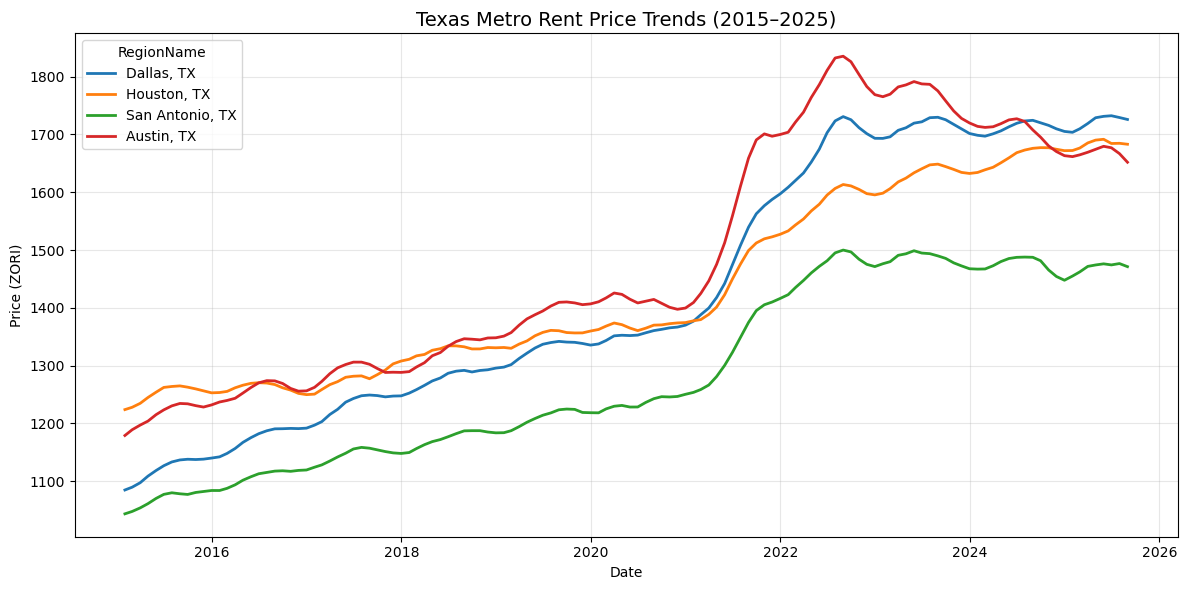

In [7]:
# --- Step 3: Filter for Texas metros and visualize baseline trends ---

# Filter Texas-only data
tx_df = df_long[df_long['StateName'] == 'TX'].copy()

# Quick check of unique Texas metros
print("Texas metros:", tx_df['RegionName'].unique())

# Select focus metros for visualization
focus_metros = ['Austin, TX', 'Dallas, TX', 'Houston, TX', 'San Antonio, TX']
tx_focus = tx_df[tx_df['RegionName'].isin(focus_metros)]

# Plot baseline trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=tx_focus, x='Date', y='Price', hue='RegionName', linewidth=2)
plt.title('Texas Metro Rent Price Trends (2015–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (ZORI)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

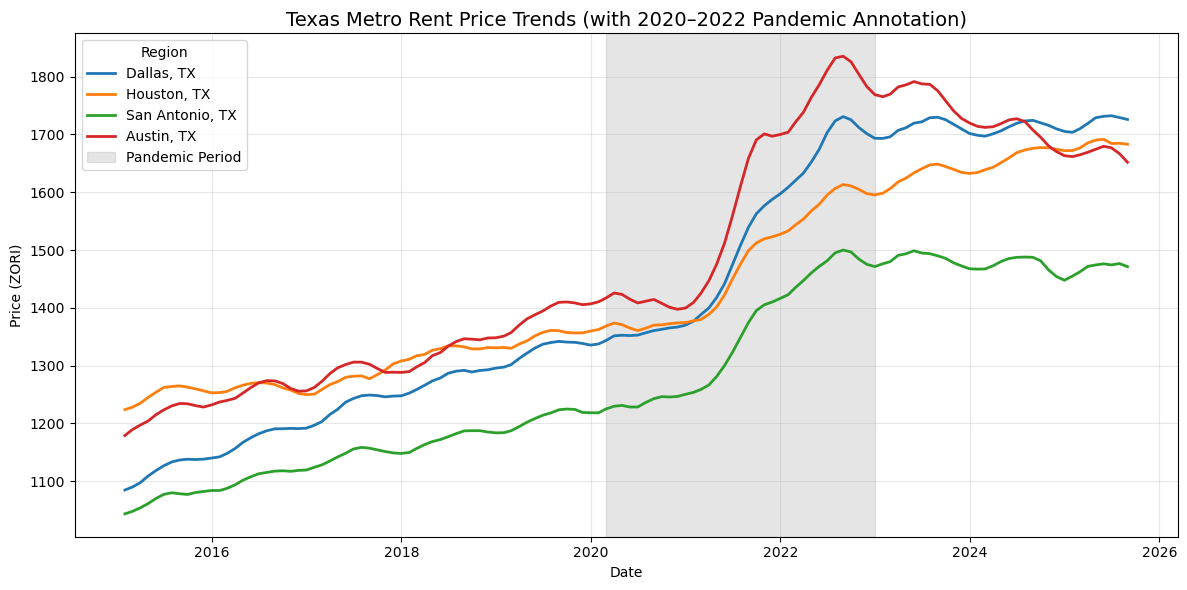

In [8]:
# --- Step 4: Add pandemic period annotation (2020–2022) ---

plt.figure(figsize=(12, 6))
sns.lineplot(data=tx_focus, x='Date', y='Price', hue='RegionName', linewidth=2)

# Shade pandemic period
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'),
            color='gray', alpha=0.2, label='Pandemic Period')

# Titles and labels
plt.title('Texas Metro Rent Price Trends (with 2020–2022 Pandemic Annotation)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (ZORI)')
plt.grid(True, alpha=0.3)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# --- Step 5: Compute pre- vs post-pandemic growth for each Texas metro ---

# Define periods
pre_period = (tx_focus['Date'] >= '2019-01-01') & (tx_focus['Date'] <= '2019-12-31')
post_period = (tx_focus['Date'] >= '2023-01-01') & (tx_focus['Date'] <= '2024-12-31')

# Compute averages per metro
pre_avg = tx_focus[pre_period].groupby('RegionName')['Price'].mean()
post_avg = tx_focus[post_period].groupby('RegionName')['Price'].mean()

# Combine and calculate % growth
growth_df = pd.DataFrame({
    'Pre-Pandemic Avg (2019)': pre_avg,
    'Post-Pandemic Avg (2023-2024)': post_avg
})
growth_df['% Change'] = ((growth_df['Post-Pandemic Avg (2023-2024)'] /
                          growth_df['Pre-Pandemic Avg (2019)']) - 1) * 100

growth_df = growth_df.round(2)
growth_df

,Pre-Pandemic Avg (2019),Post-Pandemic Avg (2023-2024),% Change
RegionName,,,
"Austin, TX",1390.32,1735.11,24.80
"Dallas, TX",1327.94,1712.42,28.95
"Houston, TX",1350.02,1646.40,21.95
"San Antonio, TX",1209.66,1479.31,22.29


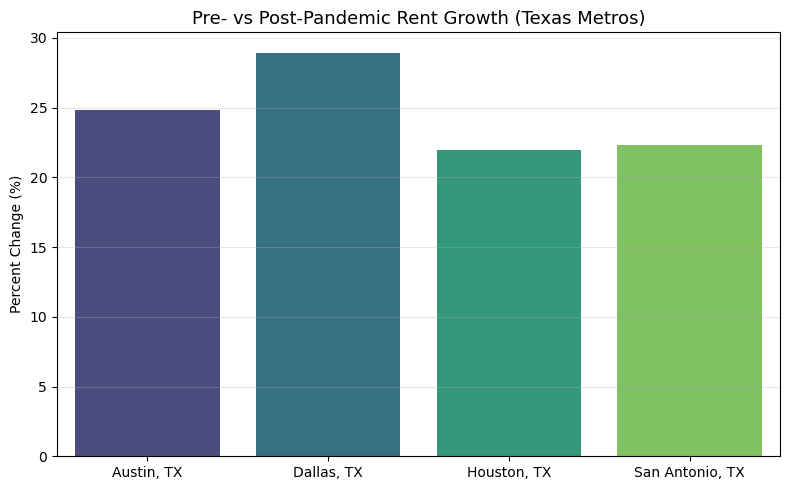

In [10]:
# --- Optional: visualize growth differentials ---

plt.figure(figsize=(8, 5))
sns.barplot(x=growth_df.index, y=growth_df['% Change'], hue=growth_df.index,
            palette='viridis', legend=False)
plt.title('Pre- vs Post-Pandemic Rent Growth (Texas Metros)', fontsize=13)
plt.ylabel('Percent Change (%)')
plt.xlabel('')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

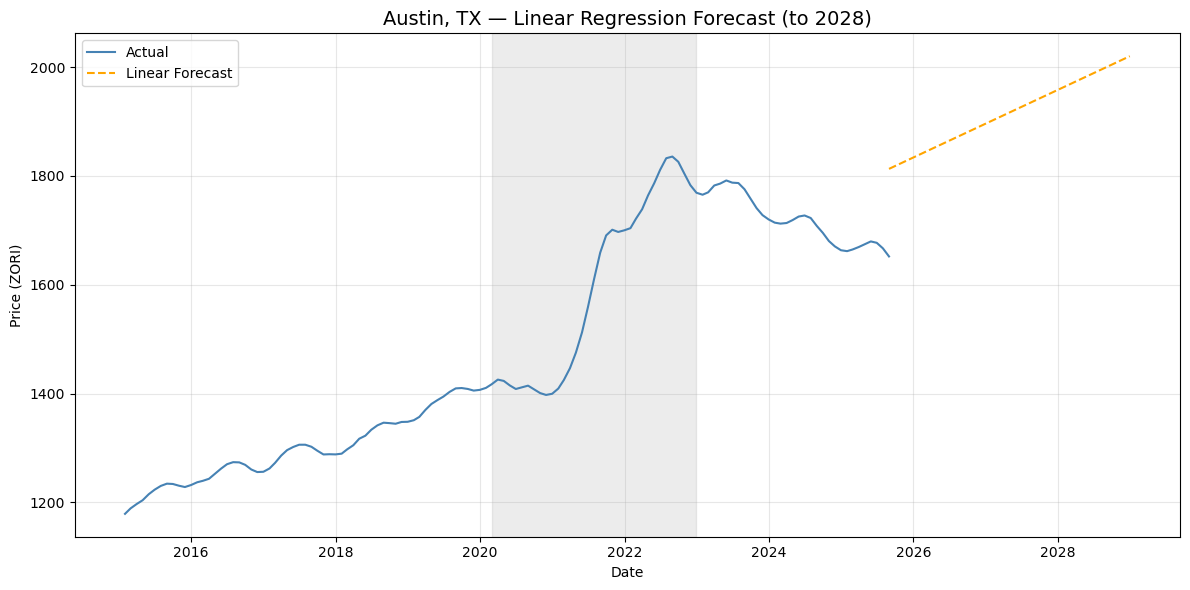

In [11]:
# --- Step 6: Linear Regression Forecast for Austin, TX ---

from sklearn.linear_model import LinearRegression

# Subset Austin data
austin = tx_focus[tx_focus['RegionName'] == 'Austin, TX'].copy()

# Convert Date → numeric (model can't read timestamps)
austin['t'] = (austin['Date'] - austin['Date'].min()).dt.days

# Train model on existing data
X = austin[['t']]          # predictor (time)
y = austin['Price']        # target (price)
model = LinearRegression()
model.fit(X, y)

# Create future timeline through 2028
future_dates = pd.date_range(start=austin['Date'].max(), end='2028-12-31', freq='ME')
future_t = pd.DataFrame((future_dates - austin['Date'].min()).days, columns=['t'])

# Predict prices
future_pred = model.predict(future_t)

# Combine for plotting
forecast_df = pd.DataFrame({'Date': future_dates, 'PredictedPrice': future_pred})

# Plot actual + forecast
plt.figure(figsize=(12,6))
plt.plot(austin['Date'], austin['Price'], label='Actual', color='steelblue')
plt.plot(forecast_df['Date'], forecast_df['PredictedPrice'], label='Linear Forecast', linestyle='--', color='orange')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'), color='gray', alpha=0.15)
plt.title('Austin, TX — Linear Regression Forecast (to 2028)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (ZORI)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
# --- Inspect model coefficients ---
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear model: Price = {intercept:.2f} + {slope:.4f} * days")
print(f"Daily growth ≈ {slope:.4f}  →  Annualized ≈ {slope * 365:.2f}")

Linear model: Price = 1155.80 + 0.1700 * days
Daily growth ≈ 0.1700  →  Annualized ≈ 62.06


### 🧠 Why the Linear Regression Is Misleading Here

A linear regression is the simplest possible model — it assumes:

“Whatever the average trend across the entire dataset was, it will continue forever.”

It doesn’t “see” short-term reversals or nonlinear curves; it fits one straight line through all the points.
So even though the last year dipped, your earlier years (2015–2022) had strong upward momentum — the model’s best-fit line is dominated by that earlier growth.

That’s why:
	•	The slope (≈ 0.17 per day → $62 / year) reflects the overall decade-long rise,
	•	not the recent decline.

In other words:

Linear regression can describe a long-term trend, but it can’t adapt to turning points or recent slowdowns.

⸻

### 🔍 What Was Just Learned
	1.	Trend models depend heavily on the window of data used.
	2.	Short-term inflections require models that “remember” recent behavior (e.g., exponential smoothing or moving averages).
	3.	Visual sanity checks (like regular calling prints or visuals) are essential — real analysts always compare model lines to reality.

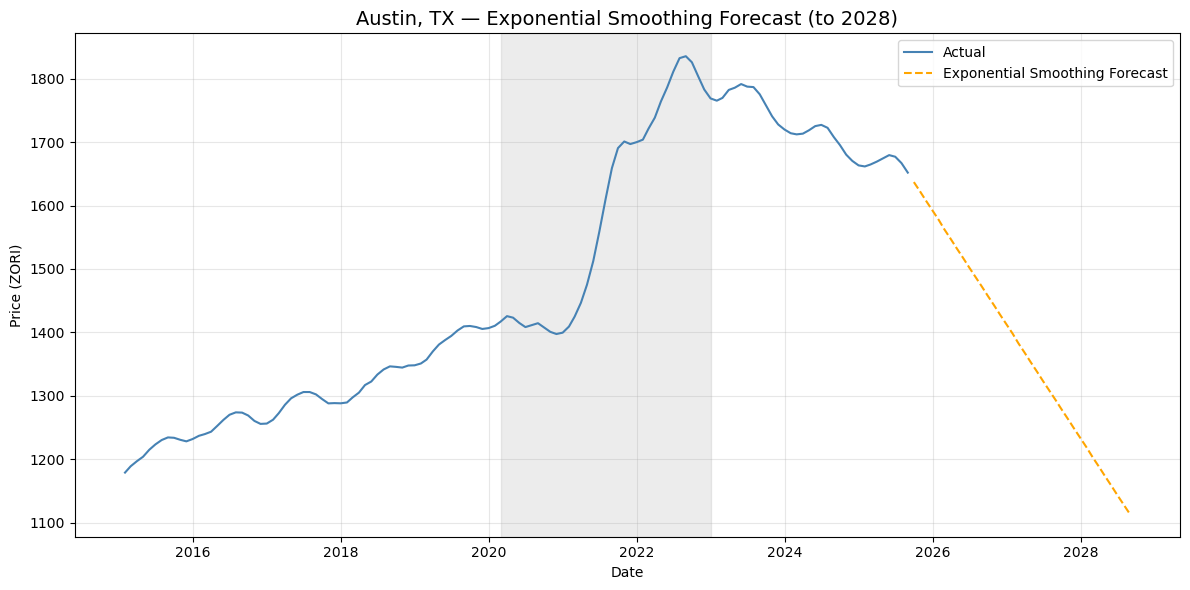

In [13]:
# --- Step 7: Exponential Smoothing Forecast for Austin, TX (finalized version) ---

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure data is sorted and indexed by date
austin_sorted = austin.sort_values('Date').copy()
austin_sorted.set_index('Date', inplace=True)

# Set monthly frequency (prevents warning)
austin_sorted = austin_sorted.asfreq('ME')

# Fit Holt’s Linear Trend model
holt_model = ExponentialSmoothing(
    austin_sorted['Price'],
    trend='add',
    seasonal=None,
    initialization_method='estimated'
).fit()

# Forecast 36 months ahead
holt_forecast = holt_model.forecast(36)

# Create figure explicitly and plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(austin_sorted.index, austin_sorted['Price'], label='Actual', color='steelblue')
ax.plot(holt_forecast.index, holt_forecast.values, label='Exponential Smoothing Forecast', linestyle='--', color='orange')
ax.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'), color='gray', alpha=0.15)
ax.set_title('Austin, TX — Exponential Smoothing Forecast (to 2028)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Price (ZORI)')
ax.legend()
ax.grid(True, alpha=0.3)
fig.tight_layout()

# Save BEFORE plt.show()
fig.savefig('../visuals/austin_forecast_comparison.png', dpi=300, bbox_inches='tight')

# Finally, display in notebook
plt.show()

### “The Analyst’s Hierarchy of Clarity”
Now it is only considering too recent data trends, and projecting a sharp drop to the bottom. The ideal questions asked around this EDA exercise are "how drastic were the changes in relation to the pandemic? what factors that caused those changes will continue to impact the housing and rental market? To what degree will future housing trends be like pre-pandemic trends, and to what degree will the lasting pandemic-related factors alter the market moving forward?"

Obviously it's not imperative that I truly answer those questions today, since I am happy with the scope of this exercise and what my true goal is that I hope to achieve from this. However, I'm seeing that in the future, it will be crucial to know exactly what questions I hope to answer, before I begin a project or any form of EDA.

### 1️⃣ Clear question → 2️⃣ Smart modeling → 3️⃣ Useful insight.

In [21]:
# --- Step 8.1: Setup helper to run Holt's Exponential Smoothing for any metro ---

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

# Create visuals directory if it doesn't exist
os.makedirs("../visuals", exist_ok=True)

def holt_forecast_plot(df: pd.DataFrame, city: str, months_ahead: int = 36):
    """
    Fits Holt’s linear trend model for one city and saves a forecast plot.
    """
    city_df = df[df["RegionName"] == city].copy()
    city_df = city_df.sort_values("Date")
    city_df = city_df.set_index("Date").asfreq("ME")

    # Fit model
    model = ExponentialSmoothing(
        city_df["Price"],
        trend="add",
        seasonal=None,
        initialization_method="estimated"
    ).fit()

    forecast = model.forecast(months_ahead)

    # Plot + save
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(city_df.index, city_df["Price"], label="Actual", color="steelblue")
    ax.plot(forecast.index, forecast.values, label="Exponential Forecast", linestyle="--", color="orange")
    ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2022-12-31"), color="gray", alpha=0.15)
    ax.set_title(f"{city} — Exponential Smoothing Forecast (next {months_ahead//12} yrs)", fontsize=13)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (ZORI)")
    ax.legend()
    ax.grid(True, alpha=0.3)
    fig.tight_layout()

    # Safe filename
    safe_name = city.lower().replace(",", "").replace(" ", "_")
    out_path = f"../visuals/{safe_name}_holt_forecast.png"
    fig.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)

    print(f"✅ Saved → {out_path}")

In [22]:
# --- Step 8.2: Generate and save forecasts for all focus metros ---

focus_metros = ["Austin, TX", "Dallas, TX", "Houston, TX", "San Antonio, TX"]

for metro in focus_metros:
    holt_forecast_plot(tx_focus, metro)

print("\nAll four Holt (Exponential Smoothing) forecasts complete ✅")

✅ Saved → ../visuals/austin_tx_holt_forecast.png
✅ Saved → ../visuals/dallas_tx_holt_forecast.png
✅ Saved → ../visuals/houston_tx_holt_forecast.png
✅ Saved → ../visuals/san_antonio_tx_holt_forecast.png

All four Holt (Exponential Smoothing) forecasts complete ✅


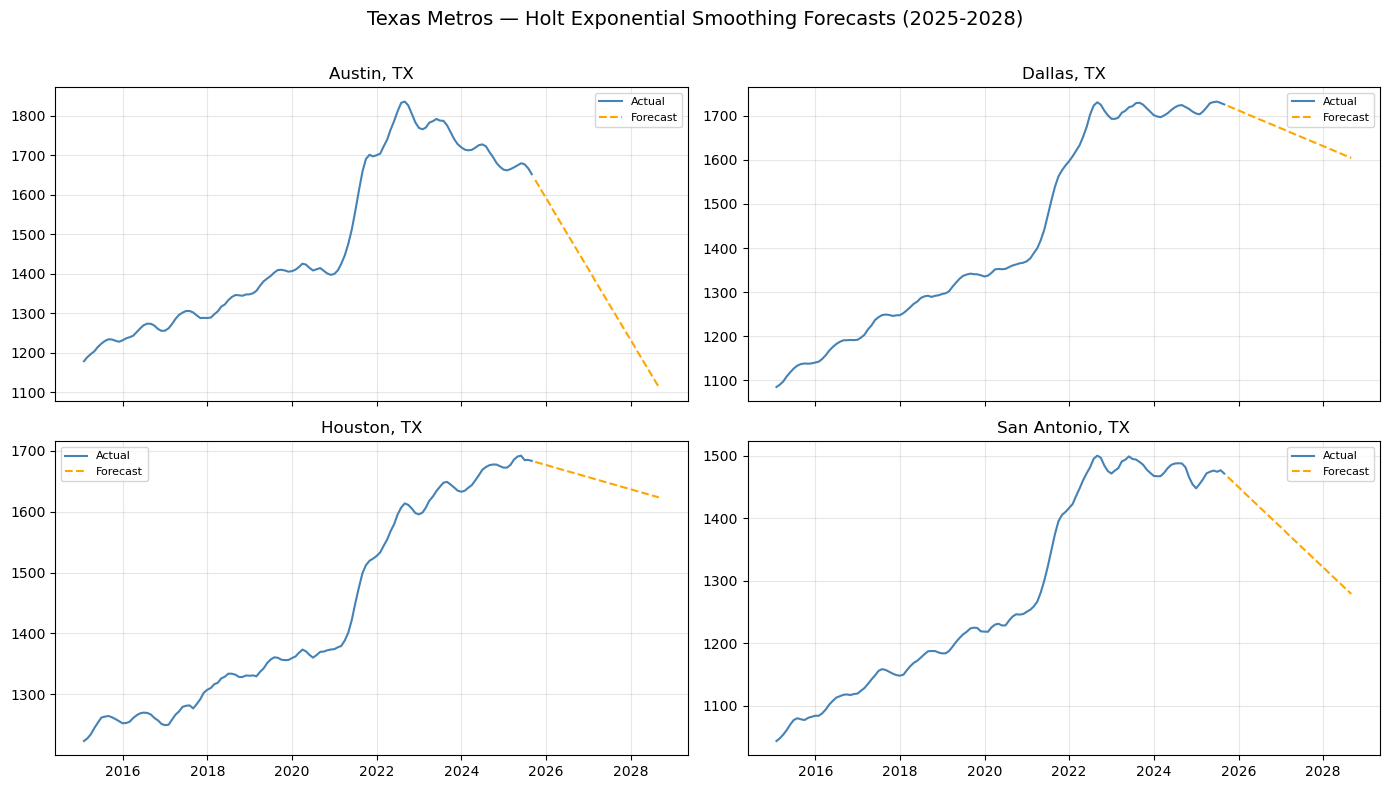

✅ Combined 2×2 comparison chart saved → ../visuals/forecast_all_texas.png


In [23]:
# --- Step 8.3: Optional combined visual (2×2 grid) ---

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.ravel()

for i, metro in enumerate(focus_metros):
    city_df = tx_focus[tx_focus["RegionName"] == metro].sort_values("Date").set_index("Date").asfreq("ME")
    model = ExponentialSmoothing(city_df["Price"], trend="add", initialization_method="estimated").fit()
    forecast = model.forecast(36)

    axes[i].plot(city_df.index, city_df["Price"], label="Actual", color="steelblue")
    axes[i].plot(forecast.index, forecast.values, label="Forecast", linestyle="--", color="orange")
    axes[i].set_title(metro)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(fontsize=8)

fig.suptitle("Texas Metros — Holt Exponential Smoothing Forecasts (2025-2028)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
fig.savefig("../visuals/forecast_all_texas.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Combined 2×2 comparison chart saved → ../visuals/forecast_all_texas.png")

Visuals found:
 - austin_forecast_comparison.png
 - austin_tx_holt_forecast.png
 - dallas_tx_holt_forecast.png
 - forecast_all_texas.png
 - houston_tx_holt_forecast.png
 - san_antonio_tx_holt_forecast.png


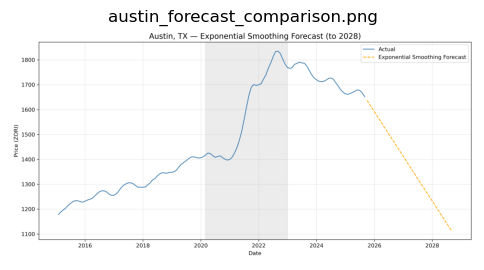

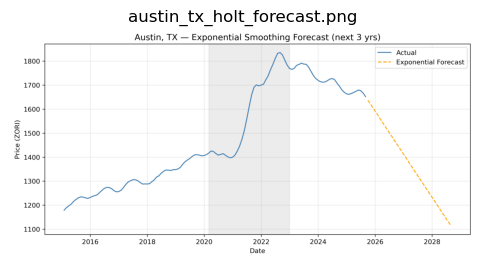

In [24]:
from pathlib import Path
import matplotlib.image as mpimg

visuals_dir = Path("../visuals")
files = sorted(visuals_dir.glob("*forecast*.png"))
print("Visuals found:")
for f in files:
    print(" -", f.name)

# Display first two as spot-check
for f in files[:2]:
    img = mpimg.imread(f)
    plt.figure(figsize=(6,3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f.name)
    plt.show()